In [1]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import os

In [2]:
# the exact set of states that constitute "Tornado Alley" is not formely
# defined; however, the following states are near universally included in
# all definitions
TORNADO_ALLEY_STATES = {
    "Texas",
    "Oklahoma",
    "Kansas",
    "Nebraska",
    "South Dakota",
    "North Dakota",
    "Iowa",
    "Missouri",
    "Colorado",
}

# the following states are colloquially defined as "Dixie Alley"
DIXIE_ALLEY_STATES = {
    "Alabama",
    "Tennessee",
    "Georgia",
    "Arkansas",
    "Louisiana",
    "Mississippi",
    "Kentucky",
    "Illinois",
    "Indiana",
    "Florida",
    "South Carolina",
    "North Carolina",
}

In [3]:
# specify the path to the US census dataset
census_dataset_path = os.path.join(
    "natural-disasters-data",
    "us-census-2014",
    "usa-states-census-2014.shp"
)

# load the US census data from disk (which will allow us to easily create a
# plot of the United States using GeoPandas)
df = gpd.read_file(census_dataset_path)

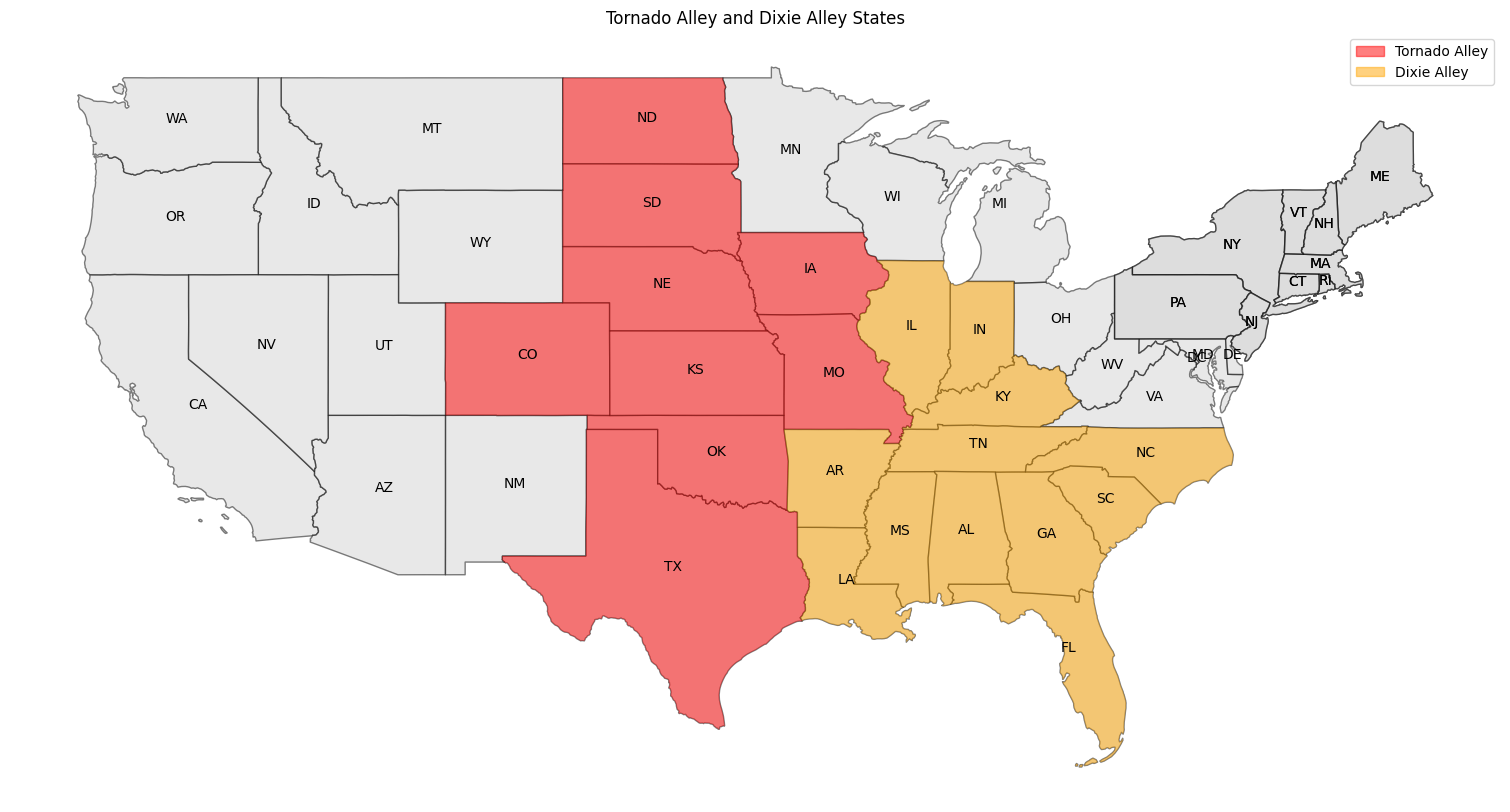

In [4]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the United States
ax = df.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# display the two-leter state codes on the map
df.apply(
    lambda x: ax.annotate(
        text=x.STUSPS,
        xy=x.geometry.centroid.coords[0],
        ha="center",
        fontsize=10
    ),
    axis=1
)

# in order to easily draw both tornado alley and dixie alley states, we first
# create a list that maps the alley states to their respective color
tornado_alleys = [
    (TORNADO_ALLEY_STATES, "red"),
    (DIXIE_ALLEY_STATES , "orange"),
]

# loop over the alleys
for (alley, color) in tornado_alleys:
    # highlight all states that are part of the alley
    alley_states = df["NAME"].isin(alley)
    alley_states = df[alley_states]
    alley_states.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks, and despine the plot
ax.set_xticks([])
ax.set_yticks([])
sns.despine(top=True, right=True, bottom=True, left=True)

# create custom legend patches for both tornado alley and dixie alley
tornado_alley_patch = mpatches.Patch(
    color="red",
    label="Tornado Alley",
    alpha=0.5
)
dixie_alley_patch = mpatches.Patch(
    color="orange",
    label="Dixie Alley",
    alpha=0.5
)

# add the patches to the plot
ax.legend(handles=[tornado_alley_patch, dixie_alley_patch])

# set the plot title
plt.title("Tornado Alley and Dixie Alley States")
plt.show()